In [6]:
from astropy.io import fits
import commands
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
raw_frames_root = '/Volumes/abraham/xcor_data/ATLAS_mwa57694/'
raw_frames_root2 = '/Volumes/abraham/xcor_data/ATLAS_mwa57639/'
labels = [l.split('/')[-1].split('.')[0] for l in commands.getoutput('ls '+raw_frames_root+'*.fits.fz').split()]
labels2 = [l.split('/')[-1].split('.')[0] for l in commands.getoutput('ls '+raw_frames_root2+'*.fits.fz').split()]

In [24]:
ra_vals = np.zeros(len(labels))
dec_vals = np.zeros(len(labels))
for i in range(len(labels)):
    hdulist = fits.open(raw_frames_root+labels[i]+'.fits')
    h = hdulist[0].header
    ra_vals[i] = h['RA']
    dec_vals[i] = h['DEC']
ra_vals[ra_vals>180] -= 360

ra_vals2 = np.zeros(len(labels2))
dec_vals2 = np.zeros(len(labels2))
for i in range(len(labels2)):
    hdulist = fits.open(raw_frames_root2+labels2[i]+'.fits')
    h = hdulist[0].header
    ra_vals2[i] = h['RA']
    dec_vals2[i] = h['DEC']
ra_vals2[ra_vals2>180] -= 360

In [4]:
def draw_square_at_point(x,y,s,c,lw):
    plt.plot([x-s/2,x+s/2,x+s/2,x-s/2,x-s/2],[y-s/2,y-s/2,y+s/2,y+s/2,y-s/2],c+'-',linewidth=lw)

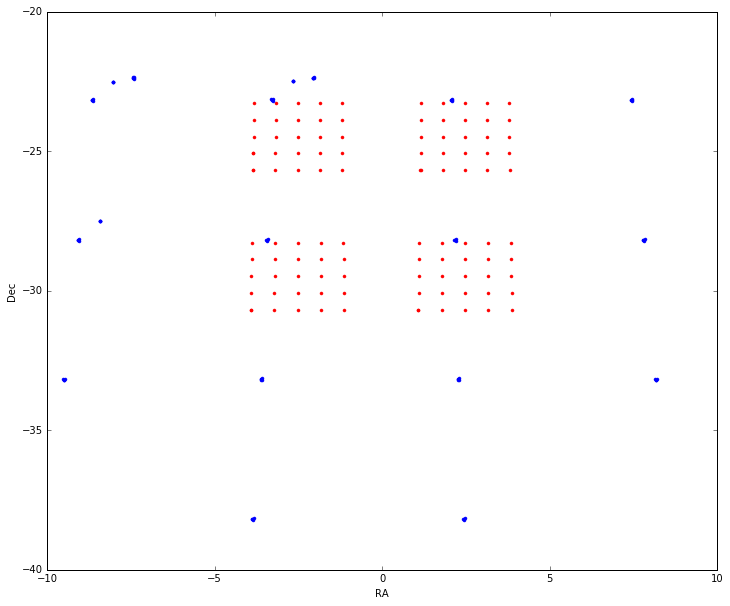

In [26]:
plt.figure(figsize=(12,10))
# for i in range(len(ra_vals)):
#     plt.text(ra_vals[i],dec_vals[i],str(i))

# label_indices_for_catalog = [52,94,49,91]
# for i in label_indices_for_catalog:
#     print(labels[i]),
#     draw_square_at_point(ra_vals[i],dec_vals[i],5,'k',1)
    
plt.plot(ra_vals,dec_vals,'r.')
plt.plot(ra_vals2,dec_vals2,'b.')
plt.xlim([-10,10])
plt.ylim([-40,-20])
plt.xlabel('RA')
plt.ylabel('Dec')

In [21]:

# frame_indices = np.zeros(len(ra_vals),dtype=int)
# plt.figure(figsize=(12,10))
# for i in range(len(ra_vals)):
#     c = 'r'
#     if ra_vals[i]< -3.5 or ra_vals[i] > 3.5 or \
#     -1.5 < ra_vals[i] < 0 or 0 < ra_vals[i] < 1.5\
#     or dec_vals[i] > -23.5 or dec_vals[i] < -30.5\
#     or -26 < dec_vals[i] < -25.5 or -28.5 < dec_vals[i] < -27:
#         c = 'b'
        
#     if ra_vals[i]<0:
#         frame_indices[i] = 0 if dec_vals[i]<-27 else 1
#     else:
#         frame_indices[i] = 2 if dec_vals[i]<-27 else 3
        
#     #if c == 'b': frame_indices[i] = -1
        
    
#     #if c == 'r': draw_square_at_point(ra_vals[i],dec_vals[i],5,c,lw=frame_indices[i]+1)
#     draw_square_at_point(ra_vals[i],dec_vals[i],5,c,lw=frame_indices[i]+1)
    
#     plt.plot(ra_vals[i],dec_vals[i],c+'.')
#     plt.xlim([-7,7])
#     plt.ylim([-35,-20])
#     plt.xlabel('RA')
#     plt.ylabel('Dec')

In [73]:
for i in range(4):
    print(' '.join(np.array(labels)[frame_indices==i])+'\n')

02a57694o0299I 02a57694o0303I 02a57694o0307I 02a57694o0319I 02a57694o0323I 02a57694o0327I 02a57694o0339I 02a57694o0343I 02a57694o0347I

02a57694o0298I 02a57694o0302I 02a57694o0306I 02a57694o0318I 02a57694o0322I 02a57694o0326I 02a57694o0338I 02a57694o0342I 02a57694o0346I

02a57694o0301I 02a57694o0305I 02a57694o0309I 02a57694o0321I 02a57694o0325I 02a57694o0329I 02a57694o0341I 02a57694o0345I 02a57694o0349I

02a57694o0300I 02a57694o0304I 02a57694o0308I 02a57694o0320I 02a57694o0324I 02a57694o0328I 02a57694o0340I 02a57694o0344I 02a57694o0348I



In [20]:
infield0 = (ra_vals<0)&(dec_vals>-27)
infield1 = (ra_vals>0)&(dec_vals>-27)
infield2 = (ra_vals<0)&(dec_vals<-27)
infield3 = (ra_vals>0)&(dec_vals<-27)

In [21]:
field0_labels = np.array(labels)[infield0]
field1_labels = np.array(labels)[infield1]
field2_labels = np.array(labels)[infield2]
field3_labels = np.array(labels)[infield3]

In [22]:
len(field0_labels),len(field1_labels),len(field2_labels),len(field3_labels)

(27, 26, 26, 26)

In [24]:
open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field0.radec','w').write("%1.3f,%1.3f"%(np.mean(ra_vals[infield0]),np.mean(dec_vals[infield0])))
open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field1.radec','w').write("%1.3f,%1.3f"%(np.mean(ra_vals[infield1]),np.mean(dec_vals[infield1])))
open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field2.radec','w').write("%1.3f,%1.3f"%(np.mean(ra_vals[infield2]),np.mean(dec_vals[infield2])))
open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field3.radec','w').write("%1.3f,%1.3f"%(np.mean(ra_vals[infield3]),np.mean(dec_vals[infield3])))

In [30]:
r,d=np.genfromtxt('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field0.radec',delimiter=',')

In [32]:
d

-24.538

In [17]:
open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field0.labels','w').write('\n'.join(field0_labels))
open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field1.labels','w').write('\n'.join(field1_labels))
open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field2.labels','w').write('\n'.join(field2_labels))
open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/21cmIRxcor/stack_at_frame_center/field3.labels','w').write('\n'.join(field3_labels))